In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplication method for time series analysis

In [2]:
data=pd.read_csv('real time example of air quality index.csv')
data

,Date,AQI
0,31-1-21,183.7
1,28-2-21,142.2
2,31-3-21,80.5
3,30-4-21,72.9
4,31-5-21,47.4
5,30-6-21,47.1
6,31-7-21,35.6
7,31-8-21,36.9
8,30-9-21,30.2
9,31-10-21,73.7


In [3]:
data.columns=['Date','AQI']

In [4]:
data

,Date,AQI
0,31-1-21,183.7
1,28-2-21,142.2
2,31-3-21,80.5
3,30-4-21,72.9
4,31-5-21,47.4
5,30-6-21,47.1
6,31-7-21,35.6
7,31-8-21,36.9
8,30-9-21,30.2
9,31-10-21,73.7


In [5]:
data.isnull().sum()

Date    0
AQI     0
dtype: int64

In [6]:
data['Date']=pd.to_datetime(data['Date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5440\1428478067.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date']=pd.to_datetime(data['Date'])


In [7]:
data.index=data['Date']

In [8]:
data=data.drop(columns=['Date'])

In [9]:
data

,AQI
Date,
2021-01-31,183.7
2021-02-28,142.2
2021-03-31,80.5
2021-04-30,72.9
2021-05-31,47.4
2021-06-30,47.1
2021-07-31,35.6
2021-08-31,36.9
2021-09-30,30.2


In [10]:
result=seasonal_decompose(data['AQI'])

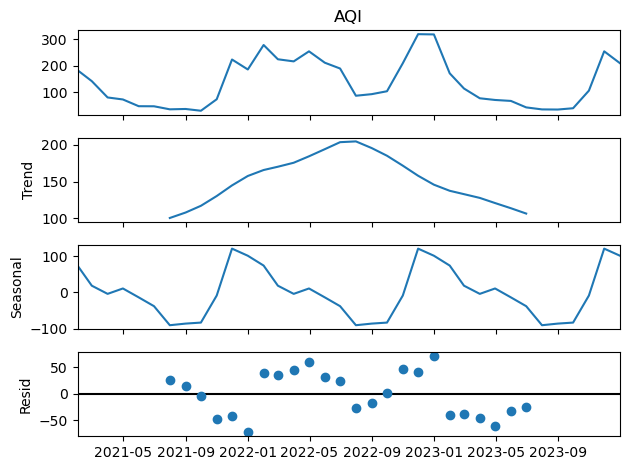

In [11]:
result.plot()
plt.show()

In [12]:
data['dt']=data.index

In [13]:
data['dt']=pd.to_datetime(data['dt'])

In [14]:
train=data[data['dt'].dt.year<2023]
test=data[data['dt'].dt.year>2022]

In [15]:
train.drop(columns=['dt'], inplace = True)
test.drop(columns=['dt'], inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5440\4112128423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['dt'], inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5440\4112128423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['dt'], inplace = True)


In [16]:
model=LinearRegression()

In [17]:
train.shape

(24, 1)

In [18]:
test.shape

(12, 1)

In [19]:
np.array(range(1,25))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [20]:
train_model = pd.DataFrame(range(1,25), columns=['X'])
train_model['Y'] = train['AQI'].values

In [21]:
train_model

,X,Y
0,1,183.7
1,2,142.2
2,3,80.5
3,4,72.9
4,5,47.4
5,6,47.1
6,7,35.6
7,8,36.9
8,9,30.2
9,10,73.7


In [22]:
model.fit(train_model[['X']], train_model['Y'])

LinearRegression()

In [23]:
train_model['linear_pred_Trend'] = model.predict(train_model[['X']])

<Axes: >

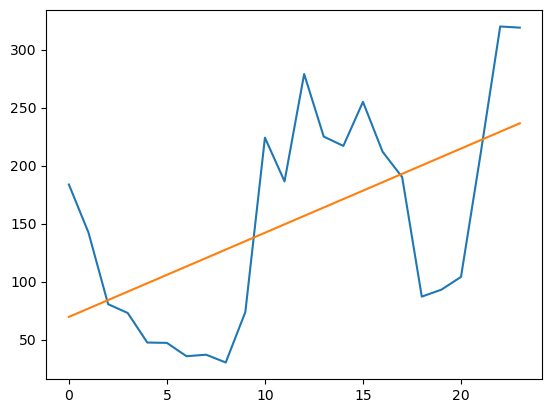

In [24]:
train_model['Y'].plot(kind = 'line')
train_model['linear_pred_Trend'].plot(kind = 'line')

In [25]:
train_model['linear_SI'] = train_model['Y']/train_model['linear_pred_Trend']

In [26]:
train_model

,X,Y,linear_pred_Trend,linear_SI
0,1,183.7,69.501000,2.643127
1,2,142.2,76.760696,1.852511
2,3,80.5,84.020391,0.958101
3,4,72.9,91.280087,0.798641
4,5,47.4,98.539783,0.481024
5,6,47.1,105.799478,0.445182
6,7,35.6,113.059174,0.314879
7,8,36.9,120.318870,0.306685
8,9,30.2,127.578565,0.236717
9,10,73.7,134.838261,0.546581


In [27]:
train_model['Month_component'] =2*list(range(1,13)) 

In [28]:
train_model_seasonal_monthly_component = train_model.groupby('Month_component')['linear_SI'].mean()

In [29]:
train_model_seasonal_monthly_component

Month_component
1     2.212270
2     1.612746
3     1.113046
4     1.114021
5     0.811460
6     0.715034
7     0.374749
8     0.377509
9     0.360563
10    0.746360
11    1.486577
12    1.298498
Name: linear_SI, dtype: float64

In [30]:
train_model

,X,Y,linear_pred_Trend,linear_SI,Month_component
0,1,183.7,69.501000,2.643127,1
1,2,142.2,76.760696,1.852511,2
2,3,80.5,84.020391,0.958101,3
3,4,72.9,91.280087,0.798641,4
4,5,47.4,98.539783,0.481024,5
5,6,47.1,105.799478,0.445182,6
6,7,35.6,113.059174,0.314879,7
7,8,36.9,120.318870,0.306685,8
8,9,30.2,127.578565,0.236717,9
9,10,73.7,134.838261,0.546581,10


In [31]:
Average_Seasonality_Factor = pd.DataFrame(train_model_seasonal_monthly_component[train_model['Month_component']]).reset_index()

In [32]:
Average_Seasonality_Factor.columns = ["Month_component", "Average_Seasonality_Factor"]

In [33]:
Average_Seasonality_Factor

,Month_component,Average_Seasonality_Factor
0,1,2.212270
1,2,1.612746
2,3,1.113046
3,4,1.114021
4,5,0.811460
5,6,0.715034
6,7,0.374749
7,8,0.377509
8,9,0.360563
9,10,0.746360


In [34]:
train_model['Average_Seasonality_Factor'] = Average_Seasonality_Factor['Average_Seasonality_Factor']

In [35]:
train_model

,X,Y,linear_pred_Trend,linear_SI,Month_component,Average_Seasonality_Factor
0,1,183.7,69.501000,2.643127,1,2.212270
1,2,142.2,76.760696,1.852511,2,1.612746
2,3,80.5,84.020391,0.958101,3,1.113046
3,4,72.9,91.280087,0.798641,4,1.114021
4,5,47.4,98.539783,0.481024,5,0.811460
5,6,47.1,105.799478,0.445182,6,0.715034
6,7,35.6,113.059174,0.314879,7,0.374749
7,8,36.9,120.318870,0.306685,8,0.377509
8,9,30.2,127.578565,0.236717,9,0.360563
9,10,73.7,134.838261,0.546581,10,0.746360


In [36]:
train_model['Actual_Prediction'] = train_model['linear_pred_Trend'] * train_model['Average_Seasonality_Factor']

In [37]:
train_model

,X,Y,linear_pred_Trend,linear_SI,Month_component,Average_Seasonality_Factor,Actual_Prediction
0,1,183.7,69.501000,2.643127,1,2.212270,153.754953
1,2,142.2,76.760696,1.852511,2,1.612746,123.795473
2,3,80.5,84.020391,0.958101,3,1.113046,93.518588
3,4,72.9,91.280087,0.798641,4,1.114021,101.687913
4,5,47.4,98.539783,0.481024,5,0.811460,79.961094
5,6,47.1,105.799478,0.445182,6,0.715034,75.650186
6,7,35.6,113.059174,0.314879,7,0.374749,42.368809
7,8,36.9,120.318870,0.306685,8,0.377509,45.421444
8,9,30.2,127.578565,0.236717,9,0.360563,46.000059
9,10,73.7,134.838261,0.546581,10,0.746360,100.637896


In [38]:
print("Linear Prediction MAPE : ")
print(mean_absolute_percentage_error(train_model['Y'],train_model['linear_pred_Trend'] ))
print("Linear with Seasonality Prediction MAPE")
print(mean_absolute_percentage_error(train_model['Y'],train_model['Actual_Prediction'] ))

Linear Prediction MAPE : 
0.763115235278255
Linear with Seasonality Prediction MAPE
0.23905198606707653


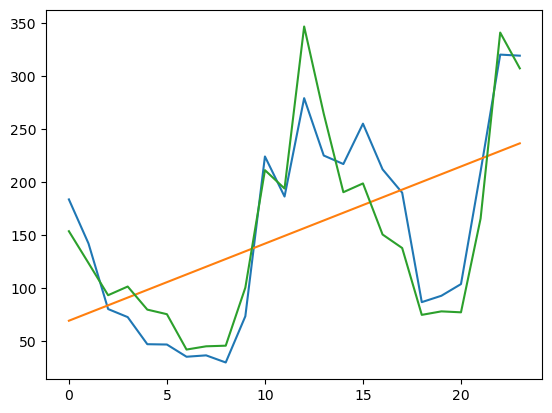

In [39]:
train_model['Y'].plot(kind = 'line')
train_model['linear_pred_Trend'].plot(kind = 'line')
train_model['Actual_Prediction'].plot(kind = 'line')
plt.show()

In [40]:
model1=LinearRegression()

In [41]:
test_model = pd.DataFrame(range(25,37), columns=['X'])
test_model['Y'] = test['AQI'].values

In [42]:
test_model

,X,Y
0,25,171.8
1,26,114.3
2,27,77.4
3,28,71.0
4,29,67.4
5,30,42.9
6,31,35.3
7,32,34.8
8,33,39.7
9,34,106.3


In [43]:
model1.fit(test_model[['X']], test_model['Y'])

LinearRegression()

In [44]:
test_model['linear_pred_Trend_test'] = model1.predict(test_model[['X']])

<Axes: >

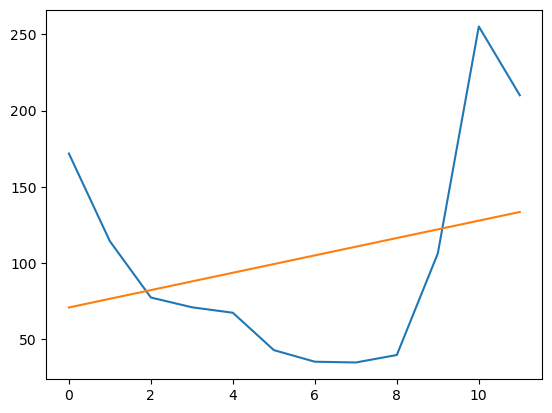

In [45]:
test_model['Y'].plot(kind = 'line')
test_model['linear_pred_Trend_test'].plot(kind = 'line')

In [46]:
test_model['linear_SI_test'] = test_model['Y'] / test_model['linear_pred_Trend_test']

In [47]:
test_model

,X,Y,linear_pred_Trend_test,linear_SI_test
0,25,171.8,70.862821,2.424403
1,26,114.3,76.554429,1.493055
2,27,77.4,82.246037,0.941079
3,28,71.0,87.937646,0.807390
4,29,67.4,93.629254,0.719860
5,30,42.9,99.320862,0.431933
6,31,35.3,105.012471,0.336151
7,32,34.8,110.704079,0.314352
8,33,39.7,116.395688,0.341078
9,34,106.3,122.087296,0.870688


In [48]:
test_model['Month_component_test'] =list(range(1,13)) 

In [49]:
test_model_seasonal_monthly_component = test_model.groupby('Month_component_test')['linear_SI_test'].mean()

In [50]:
test_model_seasonal_monthly_component

Month_component_test
1     2.424403
2     1.493055
3     0.941079
4     0.807390
5     0.719860
6     0.431933
7     0.336151
8     0.314352
9     0.341078
10    0.870688
11    1.996417
12    1.573381
Name: linear_SI_test, dtype: float64

In [51]:
test_model

,X,Y,linear_pred_Trend_test,linear_SI_test,Month_component_test
0,25,171.8,70.862821,2.424403,1
1,26,114.3,76.554429,1.493055,2
2,27,77.4,82.246037,0.941079,3
3,28,71.0,87.937646,0.807390,4
4,29,67.4,93.629254,0.719860,5
5,30,42.9,99.320862,0.431933,6
6,31,35.3,105.012471,0.336151,7
7,32,34.8,110.704079,0.314352,8
8,33,39.7,116.395688,0.341078,9
9,34,106.3,122.087296,0.870688,10


In [52]:
Average_Seasonality_Factor1 = pd.DataFrame(test_model_seasonal_monthly_component[test_model['Month_component_test']]).reset_index()

In [53]:
Average_Seasonality_Factor1.columns = ["Month_component_test", "Average_Seasonality_Factor1"]

In [54]:
Average_Seasonality_Factor1

,Month_component_test,Average_Seasonality_Factor1
0,1,2.424403
1,2,1.493055
2,3,0.941079
3,4,0.807390
4,5,0.719860
5,6,0.431933
6,7,0.336151
7,8,0.314352
8,9,0.341078
9,10,0.870688


In [55]:
test_model['Average_Seasonality_Factor1'] = Average_Seasonality_Factor1['Average_Seasonality_Factor1']

In [56]:
test_model

,X,Y,linear_pred_Trend_test,linear_SI_test,Month_component_test,Average_Seasonality_Factor1
0,25,171.8,70.862821,2.424403,1,2.424403
1,26,114.3,76.554429,1.493055,2,1.493055
2,27,77.4,82.246037,0.941079,3,0.941079
3,28,71.0,87.937646,0.807390,4,0.807390
4,29,67.4,93.629254,0.719860,5,0.719860
5,30,42.9,99.320862,0.431933,6,0.431933
6,31,35.3,105.012471,0.336151,7,0.336151
7,32,34.8,110.704079,0.314352,8,0.314352
8,33,39.7,116.395688,0.341078,9,0.341078
9,34,106.3,122.087296,0.870688,10,0.870688


In [57]:
test_model['Actual_Prediction_test'] = test_model['linear_pred_Trend_test'] * test_model['Average_Seasonality_Factor1']

In [58]:
test_model

,X,Y,linear_pred_Trend_test,linear_SI_test,Month_component_test,Average_Seasonality_Factor1,Actual_Prediction_test
0,25,171.8,70.862821,2.424403,1,2.424403,171.8
1,26,114.3,76.554429,1.493055,2,1.493055,114.3
2,27,77.4,82.246037,0.941079,3,0.941079,77.4
3,28,71.0,87.937646,0.807390,4,0.807390,71.0
4,29,67.4,93.629254,0.719860,5,0.719860,67.4
5,30,42.9,99.320862,0.431933,6,0.431933,42.9
6,31,35.3,105.012471,0.336151,7,0.336151,35.3
7,32,34.8,110.704079,0.314352,8,0.314352,34.8
8,33,39.7,116.395688,0.341078,9,0.341078,39.7
9,34,106.3,122.087296,0.870688,10,0.870688,106.3


In [59]:
print("Linear Prediction MAPE by test method: ")
print(mean_absolute_percentage_error(test_model['Y'],test_model['linear_pred_Trend_test'] ))
print("Linear with Seasonality Prediction MAPE by test method")
print(mean_absolute_percentage_error(test_model['Y'],test_model['Actual_Prediction_test'] ))

Linear Prediction MAPE by test method: 
0.835266155524646
Linear with Seasonality Prediction MAPE by test method
0.0


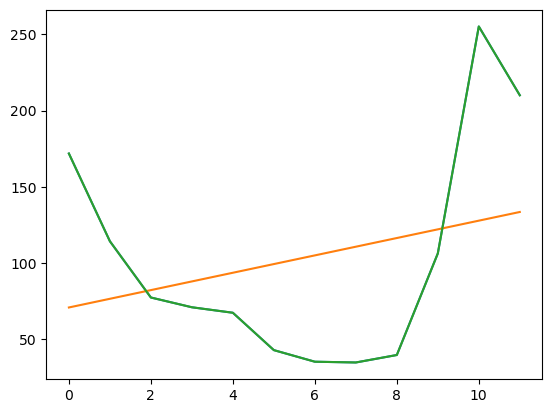

In [60]:
test_model['Y'].plot(kind = 'line')
test_model['linear_pred_Trend_test'].plot(kind = 'line')
test_model['Actual_Prediction_test'].plot(kind = 'line')
plt.show()